In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Dataset.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

# LEVEL 1 :TASK 1

Task: Top Cuisines

Q1] Determine the top three most common cuisines in the dataset.

In [8]:
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
top_three_cuisines = cuisine_counts.head(3)
print("Top three most common cuisines:")
print(top_three_cuisines)

Top three most common cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


Q2] Calculate the percentage of restaurants that serve each of the top cuisines.

In [9]:
# Total number of restaurants
total_restaurants = len(df)

# Calculate the percentage for each top cuisine
percentage_per_cuisine = (top_three_cuisines / total_restaurants) * 100

print("Percentage of restaurants that serve each of the top cuisines:")
print(percentage_per_cuisine)

Percentage of restaurants that serve each of the top cuisines:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64


# LEVEL 1 : TASK-2

Task: City Analysis

Q1] Identify the city with the highest number of restaurants in the dataset.

In [10]:
# Count the occurrences of each city
city_counts = df['City'].value_counts()

# Get the city with the highest count
city_with_highest_count = city_counts.idxmax()

# Get the count of restaurants in the city with the highest count
highest_count = city_counts.max()

print("City with the highest number of restaurants:", city_with_highest_count)
print("Number of restaurants in the city:", highest_count)


City with the highest number of restaurants: New Delhi
Number of restaurants in the city: 5473


Q2] Calculate the average rating for restaurants in each city.

In [11]:
# Calculate the average rating for restaurants in each city
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()

print("Average rating for restaurants in each city:")
print(average_rating_per_city)


Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


Q3] Determine the city with the highest average rating.

In [12]:
# Calculate the average rating for restaurants in each city
average_rating_per_city = df.groupby('City')['Aggregate rating'].mean()

# Get the city with the highest average rating
city_with_highest_avg_rating = average_rating_per_city.idxmax()
highest_avg_rating = average_rating_per_city.max()

print("City with the highest average rating:", city_with_highest_avg_rating)
print("Highest average rating:", highest_avg_rating)

City with the highest average rating: Inner City
Highest average rating: 4.9


# LEVEL 1 : TASK-3

Task: Price Range Distribution

Q1] Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

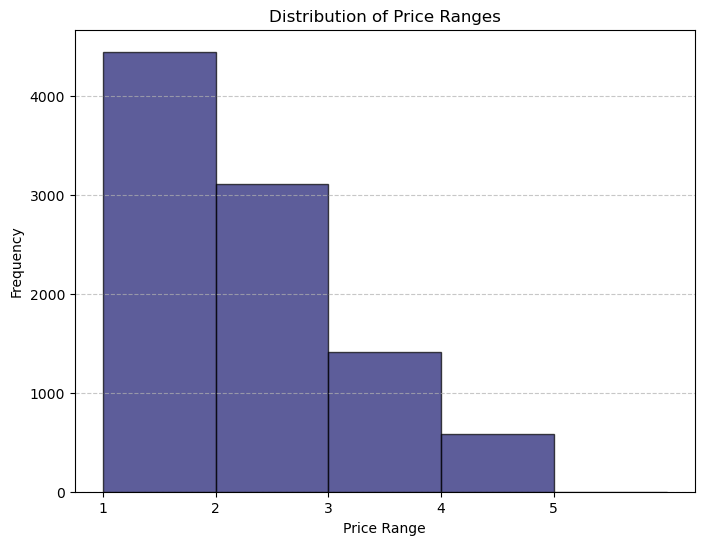

In [13]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Price range'], bins=[1, 2, 3, 4, 5, 6], edgecolor='black', alpha=0.7, color='midnightblue')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q2] Calculate the percentage of restaurants in each price range category.

In [14]:
# Get the count of restaurants in each price range
price_range_counts = df['Price range'].value_counts()

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants in each price range category
price_range_percentages = (price_range_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range category:")
print(price_range_percentages)

Percentage of restaurants in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


# LEVEL 1 : TASK-4

Task: Online Delivery

Q1] Determine the percentage of restaurants that offer online delivery.

In [15]:
# Get the count of restaurants offering online delivery
online_delivery_counts = df['Has Online delivery'].value_counts()

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants that offer online delivery
percentage_online_delivery = (online_delivery_counts['Yes'] / total_restaurants) * 100

print("Percentage of restaurants that offer online delivery:", percentage_online_delivery)

Percentage of restaurants that offer online delivery: 25.662234321013504


Q2] Compare the average ratings of restaurants with and without online delivery.

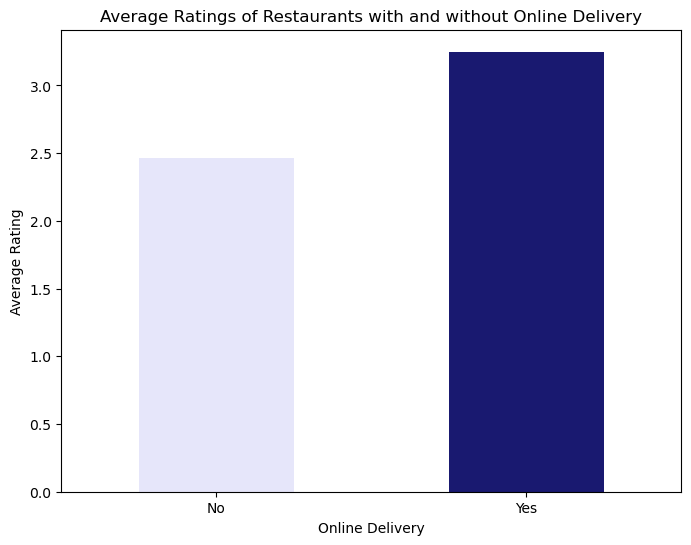

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Group the data based on the "Has Online delivery" column and calculate the mean of "Aggregate rating"
ratings_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
ratings_comparison.plot(kind='bar', color=['lavender', 'midnightblue'])
plt.title('Average Ratings of Restaurants with and without Online Delivery')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()